In [ ]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#'battery_data/' +
def load_data(battery):
  mat = loadmat(battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []

  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]


In [ ]:
dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.004902             24.330034       -0.0006         0.000   0.000  
1         -0.001478             24.325993       -0.0006         4.206  16.781  
2         -2.012528             24.389085       -1.9982         3.062  35.703  
3         -2.

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,2008-05-07 01:58:43.570826240,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
min,1.000000,24.0,2008-04-02 15:25:41,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,2008-04-29 22:00:04,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,2008-05-07 21:56:09,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,2008-05-18 03:05:19,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,2008-05-27 20:45:42,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000
std,45.699687,0.0,NaN,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295


In [ ]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)


In [ ]:
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)


In [ ]:
dataset.voltage_measured

,voltage_measured
0,4.191492
1,4.190749
2,3.974871
3,3.951717
4,3.934352
...,...
50280,3.579262
50281,3.581964
50282,3.584484
50283,3.587336


In [ ]:
import scipy.io
import datetime
import pandas as pd

def load_impedance_data(battery):
    mat = scipy.io.loadmat(battery + '.mat')
    print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
    counter = 0
    impedance_dataset = []

    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'impedance':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                          int(row['time'][0][1]),
                                          int(row['time'][0][2]),
                                          int(row['time'][0][3]),
                                          int(row['time'][0][4]),
                                          int(row['time'][0][5]))
            data = row['data']
            if len(data) > 0:
              for j in range(len(data[0][0]['Sense_current'][0])):
                sense_current = np.absolute(data[0][0]['Sense_current'][0][j])
                battery_current = np.absolute(data[0][0]['Battery_current'][0][j])
                current_ratio = np.absolute(data[0][0]['Current_ratio'][0][j])
                battery_impedance = np.absolute(data[0][0]['Battery_impedance'][0])  # Remove imaginary part
                re = data[0][0]['Re'][0]
                rct = data[0][0]['Rct'][0]
                impedance_dataset.append([counter + 1, ambient_temperature, date_time,
                                          sense_current, battery_current, current_ratio,
                                          battery_impedance, re, rct])
                counter += 1

    print(impedance_dataset[0])
    return pd.DataFrame(data=impedance_dataset,
                        columns=['cycle', 'ambient_temperature', 'datetime',
                                 'sense_current', 'battery_current', 'current_ratio',
                                 'battery_impedance', 'Re', 'Rct'])

impedance_data = load_impedance_data('B0005')
pd.set_option('display.max_columns', 10)
print(impedance_data.head())
impedance_data.describe()


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 18, 20, 55, 29), 1.4142135623730951, 1.4142135623730951, 1.0, array([0.45185083]), array([0.0446687]), array([0.06945627])]
   cycle  ambient_temperature            datetime  sense_current  \
0      1                   24 2008-04-18 20:55:29       1.414214   
1      2                   24 2008-04-18 20:55:29     821.409088   
2      3                   24 2008-04-18 20:55:29     828.647023   
3      4                   24 2008-04-18 20:55:29     829.100123   
4      5                   24 2008-04-18 20:55:29     826.645838   

   battery_current  current_ratio      battery_impedance  \
0         1.414214       1.000000  [0.45185083350457195]   
1       347.140474       2.366215  [0.45185083350457195]   
2       337.963238       2.451885  [0.45185083350457195]   
3       336.519665       2.463749  [0.45185083350457195]   
4       337.637183       2.448326  [0.45185083350457195]   

                      Re                   

,cycle,ambient_temperature,datetime,sense_current,battery_current,current_ratio
count,13344.000000,13344.0,13344,13344.000000,13344.000000,13344.000000
mean,6672.500000,24.0,2008-05-09 10:03:23.428057600,841.578336,319.741728,2.708148
min,1.000000,24.0,2008-04-18 20:55:29,1.414214,1.414214,1.000000
25%,3336.750000,24.0,2008-05-01 07:44:12,823.829800,323.377817,2.416478
50%,6672.500000,24.0,2008-05-10 11:26:19.500000,831.230472,333.959895,2.488219
75%,10008.250000,24.0,2008-05-18 18:26:10,842.753519,340.930777,2.604971
max,13344.000000,24.0,2008-05-27 21:34:28,933.691996,508.004498,5.453815
std,3852.225331,0.0,NaN,47.967140,42.679072,0.629680


In [ ]:
combined_data = dataset.join(impedance_data[['battery_impedance']], on='cycle')
print(combined_data.head())

   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   ...  temperature_measured  current_load  voltage_load    time  \
0  ...             24.330034       -0.0006         0.000   0.000   
1  ...             24.325993       -0.0006         4.206  16.781   
2  ...             24.389085       -1.9982         3.062  35.703   
3  ...             24.544752       -1.9982         3.030  53.781   
4  ...             24.731385       -1.9982         3.011  71.922   

       battery_impedance  
0  [0.45185083350457195]  
1  [0.45185083350457195]  
2  [0.45185083350457195

In [ ]:
combined_data['delta_voltage'] = combined_data['current_load'] * combined_data['battery_impedance'] + combined_data['voltage_measured']

# Drop datetime columns
combined_data = combined_data.drop('datetime', axis=1)


In [ ]:
soh.tail()

,SoH
50280,0.713756
50281,0.713756
50282,0.713756
50283,0.713756
50284,0.713756


In [ ]:
combined_data.head()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,...,current_load,voltage_load,time,battery_impedance,delta_voltage
0,1,24,1.856487,4.191492,-0.004902,...,-0.0006,0.000,0.000,[0.45185083350457195],[4.191220697005192]
1,1,24,1.856487,4.190749,-0.001478,...,-0.0006,4.206,16.781,[0.45185083350457195],[4.190477957276]
2,1,24,1.856487,3.974871,-2.012528,...,-1.9982,3.062,35.703,[0.45185083350457195],[3.0719825767211537]
3,1,24,1.856487,3.951717,-2.013979,...,-1.9982,3.030,53.781,[0.45185083350457195],[3.048828372002058]
4,1,24,1.856487,3.934352,-2.011144,...,-1.9982,3.011,71.922,[0.45185083350457195],[3.03146415392376]


In [ ]:
X_train = combined_data.copy()
Y_train = soh.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

# Fit the regressor to the training data
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
# Predict on the test data
Y_pred = regressor.predict(X_train)

Y_predicted = pd.DataFrame(data=Y_pred, columns=['SoH'])
# Print the predicted values
print(Y_predicted)

            SoH
0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
...         ...
50280  0.713756
50281  0.713756
50282  0.713756
50283  0.713756
50284  0.713756

[50285 rows x 1 columns]


In [ ]:
print(Y_train)

            SoH
0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
...         ...
50280  0.713756
50281  0.713756
50282  0.713756
50283  0.713756
50284  0.713756

[50285 rows x 1 columns]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Calculate the mean squared error
mse = mean_squared_error(Y_train, Y_pred)

# Print the mean squared error
print("Mean squared error:", mse)

# Calculate R-squared score for regression problems
r2 = r2_score(Y_train, Y_pred)
print("R-squared score:", r2) # Print R-squared score

Mean squared error: 1.5959250484054827e-30
R-squared score: 1.0


In [ ]:
dataset7, capacity7 = load_data('B0018')
pd.set_option('display.max_columns', 10)
print(dataset7.head())
dataset7.describe()

Total data in dataset:  319
[1, 24, datetime.datetime(2008, 7, 7, 15, 15, 28), 1.8550045207910817, 4.188108651124536, 0.00013066734156636677, 23.8195202516044, 0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-07-07 15:15:28  1.855005          4.188109   
1      1                   24 2008-07-07 15:15:28  1.855005          4.188196   
2      1                   24 2008-07-07 15:15:28  1.855005          3.977432   
3      1                   24 2008-07-07 15:15:28  1.855005          3.961974   
4      1                   24 2008-07-07 15:15:28  1.855005          3.949835   

   current_measured  temperature_measured  current_load  voltage_load    time  
0          0.000131             23.819520        0.0006         0.000   0.000  
1          0.001459             23.828807        0.0006         4.203   9.422  
2         -2.005672             23.844944        1.9988         3.029  19.578  
3         -2.01

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,34866.000000,34866.0,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,59.962657,24.0,2008-07-28 16:18:30.794154752,1.584405,3.501219,-1.842923,31.083216,1.833923,2.408419,1547.119848
min,1.000000,24.0,2008-07-07 15:15:28,1.341051,2.278634,-2.026719,22.350256,0.000400,0.000000,0.000000
25%,27.000000,24.0,2008-07-14 20:57:32,1.428376,3.382813,-2.009485,28.462162,1.998600,2.459000,763.339250
50%,57.000000,24.0,2008-08-01 21:32:12,1.605737,3.497088,-2.008341,31.121895,1.998600,2.589000,1537.289500
75%,92.000000,24.0,2008-08-08 23:54:01,1.711846,3.662815,-2.007073,33.982822,1.998800,2.751000,2312.964500
max,132.000000,24.0,2008-08-20 08:37:19,1.855005,4.193543,0.014306,38.878688,1.999000,4.209000,3434.891000
std,37.957008,0.0,NaN,0.156427,0.250037,0.552445,3.649983,0.549609,0.744116,908.373277


In [ ]:
C7 = dataset7['capacity'][0]
soh7 = []
for i in range(len(dataset7)):
  soh7.append([dataset7['capacity'][i] / C])
soh7 = pd.DataFrame(data=soh7, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset7 = dataset7[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset7 = sc.fit_transform(train_dataset7)

print(train_dataset7.shape)
print(soh7.shape)

(34866, 7)
(34866, 1)


In [ ]:
impedance_data7 = load_impedance_data('B0018')
pd.set_option('display.max_columns', 10)
print(impedance_data7.head())
impedance_data7.describe()

Total data in dataset:  319
[1, 24, datetime.datetime(2008, 7, 7, 14, 43, 14), 833.1994729013353, 339.87661328407444, 2.451476330926405, array([0.20979833]), array([0.06515815]), array([0.0955537])]
   cycle  ambient_temperature            datetime  sense_current  \
0      1                   24 2008-07-07 14:43:14     833.199473   
1      2                   24 2008-07-07 14:43:14     827.093725   
2      3                   24 2008-07-07 14:43:14     826.967833   
3      4                   24 2008-07-07 14:43:14     825.735150   
4      5                   24 2008-07-07 14:43:14     825.021823   

   battery_current  current_ratio      battery_impedance  \
0       339.876613       2.451476  [0.20979832669592016]   
1       340.910808       2.426129  [0.20979832669592016]   
2       339.215211       2.437885  [0.20979832669592016]   
3       340.648619       2.424009  [0.20979832669592016]   
4       340.883257       2.420247  [0.20979832669592016]   

                      Re       

,cycle,ambient_temperature,datetime,sense_current,battery_current,current_ratio
count,2544.000000,2544.0,2544,2544.000000,2544.000000,2544.000000
mean,1272.500000,24.0,2008-07-27 10:13:40.339622656,822.062932,342.690251,2.472553
min,1.000000,24.0,2008-07-07 14:43:14,785.766158,179.647729,2.056937
25%,636.750000,24.0,2008-07-12 07:42:35,798.647540,347.080963,2.176290
50%,1272.500000,24.0,2008-07-31 23:02:54,809.964073,355.824980,2.275967
75%,1908.250000,24.0,2008-08-09 11:05:03,820.427772,366.919091,2.362350
max,2544.000000,24.0,2008-08-20 01:34:44,926.954344,382.007940,5.120386
std,734.533866,0.0,NaN,37.181407,42.805353,0.594578


In [ ]:
combined_data7 = dataset7.join(impedance_data7[['battery_impedance']], on='cycle')
print(combined_data7.head())

   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-07-07 15:15:28  1.855005          4.188109   
1      1                   24 2008-07-07 15:15:28  1.855005          4.188196   
2      1                   24 2008-07-07 15:15:28  1.855005          3.977432   
3      1                   24 2008-07-07 15:15:28  1.855005          3.961974   
4      1                   24 2008-07-07 15:15:28  1.855005          3.949835   

   ...  temperature_measured  current_load  voltage_load    time  \
0  ...             23.819520        0.0006         0.000   0.000   
1  ...             23.828807        0.0006         4.203   9.422   
2  ...             23.844944        1.9988         3.029  19.578   
3  ...             23.925577        1.9988         3.026  29.016   
4  ...             24.010628        1.9988         3.015  38.485   

       battery_impedance  
0  [0.20979832669592016]  
1  [0.20979832669592016]  
2  [0.20979832669592016

In [ ]:
combined_data7['delta_voltage'] = combined_data7['current_load'] * combined_data7['battery_impedance'] + combined_data7['voltage_measured']

# Drop datetime columns
combined_data7 = combined_data7.drop('datetime', axis=1)

In [ ]:
X_test = combined_data7.copy()
Y_test = soh7.copy()

In [ ]:
# Predict on the test data
Y_pred_test = regressor.predict(X_test)

# Create a DataFrame for predicted values
Y_predicted_test = pd.DataFrame(data=Y_pred_test, columns=['SoH'])

# Evaluate the model
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)

print("Mean squared error (Test):", mse_test)
print("R-squared score (Test):", r2_test)

Mean squared error (Test): 0.00046014244390724226
R-squared score (Test): 0.9351862357181029


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming Y_true and Y_pred are your true and predicted values respectively
rmse = mean_squared_error(Y_test, Y_pred_test, squared=False)
print("RMSE:", rmse)


RMSE: 0.021450931073201514


In [ ]:
# Assuming Y_true and Y_pred are your true and predicted values respectively
import numpy as np
errors = Y_test['SoH'].values - Y_pred_test # Extract the 'SoH' column as a NumPy array for the subtraction
standard_deviation_of_errors = np.std(errors)
print("Standard Deviation of Errors:", standard_deviation_of_errors)

Standard Deviation of Errors: 0.016445045541172418


In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming Y_test and Y_pred_test are your true and predicted values respectively
mae = mean_absolute_error(Y_test['SoH'], Y_pred_test)
print("MAE:", mae)

MAE: 0.014004325462893997


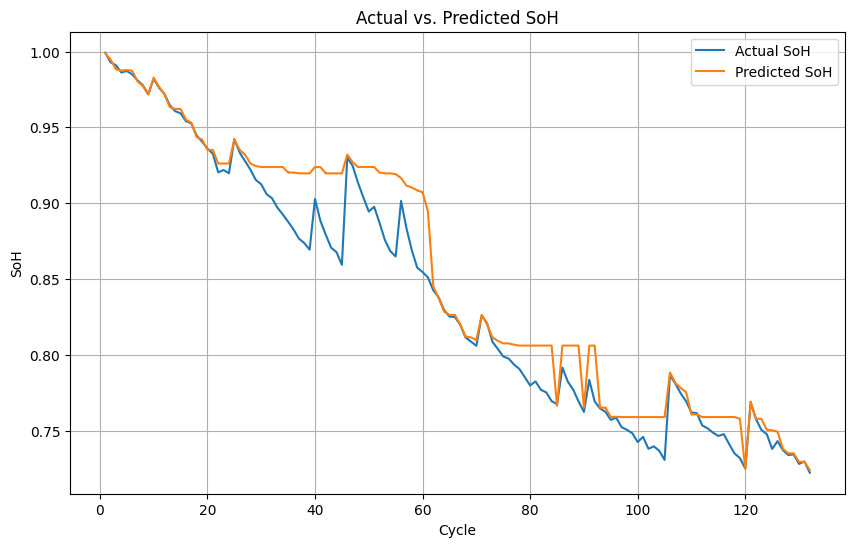

In [ ]:
# Extract the 'cycle' column for plotting
cycles = combined_data7['cycle']

# Plot the predicted and actual SoH values against cycles
plt.figure(figsize=(10, 6))
plt.plot(cycles, Y_test, label='Actual SoH')
plt.plot(cycles, Y_predicted_test, label='Predicted SoH')
plt.xlabel('Cycle')
plt.ylabel('SoH')
plt.title('Actual vs. Predicted SoH')
plt.legend()
plt.grid(True)
plt.show()

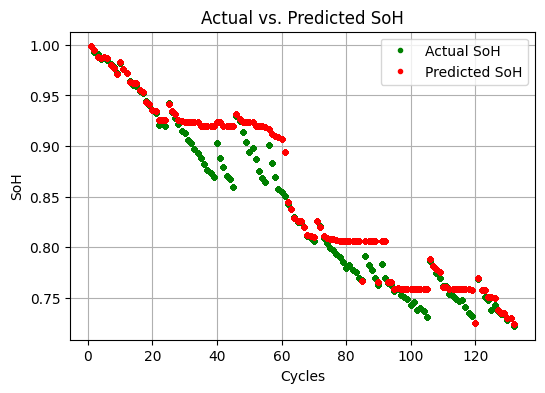

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'cycle' column for plotting
cycles = combined_data7['cycle']

# Plot the predicted and actual SoH values against cycles
plt.figure(figsize=(6, 4))  # Adjust figure size to be more compact
plt.plot(cycles, Y_test, 'g.', label='Actual SoH')  # Green dots for actual SoH
plt.plot(cycles, Y_predicted_test, 'r.', label='Predicted SoH')  # Red dots for predicted SoH

plt.xlabel('Cycles')
plt.ylabel('SoH')
plt.title('Actual vs. Predicted SoH')
plt.legend(loc='best')  # Place legend inside the plot area
plt.grid(True)
plt.show()


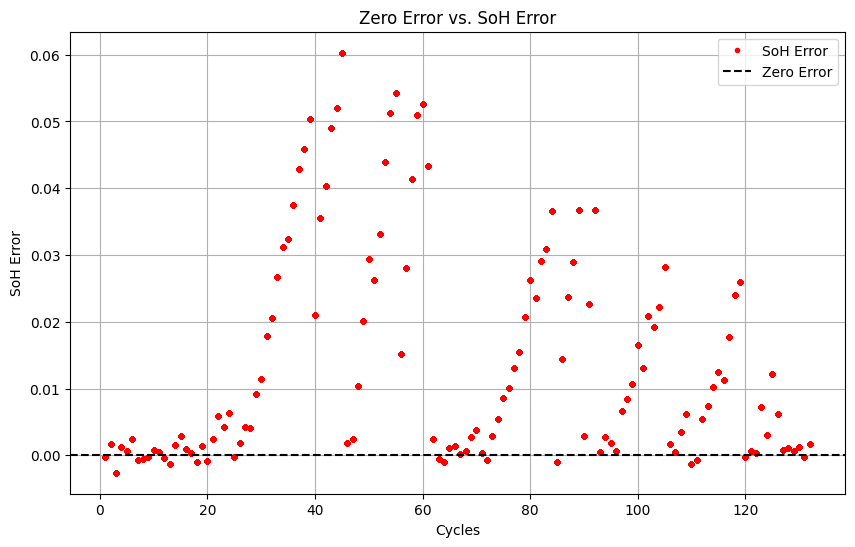

In [ ]:
import matplotlib.pyplot as plt

# Calculate the SoH error
soh_error = Y_predicted_test - Y_test

# Extract the 'cycle' column for plotting
cycles = combined_data7['cycle']

# Plot the SoH error against cycles
plt.figure(figsize=(10, 6))
plt.plot(cycles, soh_error, 'r.', label='SoH Error')  # Red dots for error

# Add a horizontal line at y=0 to represent zero error
plt.axhline(y=0, color='k', linestyle='--', label='Zero Error')  # Dashed black line

plt.xlabel('Cycles')
plt.ylabel('SoH Error')
plt.title('Zero Error vs. SoH Error')
plt.legend(loc='best')  # Place legend in the best position
plt.grid(True)
plt.show()
